In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import json

In [2]:
with open("sarcasm.json") as file:
    data = json.load(file)

In [3]:
headline = []
sarcastic = []
for content in data:
    headline.append(content["headline"])
    sarcastic.append(content["is_sarcastic"])

In [4]:
len(headline)

26709

In [5]:
training_size = 15000

In [6]:
training_data = headline[:training_size]
testing_data = headline[training_size:]
training_label = sarcastic[:training_size]
testing_label = sarcastic[training_size:]

In [7]:
vocabulary = 10000
embedding_dim = 16
max_length =  100
trunc ='post'
padding ='post'
oov_tok = "<OOV>"

In [8]:
tokenizer =Tokenizer(num_words=vocabulary, oov_token = oov_tok)

In [9]:
tokenizer.fit_on_texts(training_data)

In [10]:
training_data = tokenizer.texts_to_sequences(training_data) 

In [11]:
padded_training_data = pad_sequences(training_data, padding=padding, truncating=trunc, maxlen=max_length)

In [12]:
testing_data = tokenizer.texts_to_sequences(testing_data) 

In [13]:
padded_testing_data = pad_sequences(testing_data, padding=padding, truncating=trunc, maxlen=max_length)

In [14]:
training_data = np.array(padded_training_data)
testing_data = np.array(padded_testing_data)
training_label = np.array(training_label)
testing_label = np.array(testing_label)

In [15]:
model = keras.Sequential()

In [16]:
model.add(keras.layers.Embedding(vocabulary, embedding_dim, input_length=max_length))

In [17]:
model.add(keras.layers.GlobalAveragePooling1D())

In [18]:
model.add(keras.layers.Dense(24, activation='relu'))

In [19]:
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(training_data, training_label, epochs=25, validation_data=(testing_data, testing_label), verbose=2)

Train on 15000 samples, validate on 11709 samples
Epoch 1/25
15000/15000 - 3s - loss: 0.6801 - accuracy: 0.5600 - val_loss: 0.6463 - val_accuracy: 0.5819
Epoch 2/25
15000/15000 - 2s - loss: 0.5011 - accuracy: 0.7840 - val_loss: 0.4096 - val_accuracy: 0.8277
Epoch 3/25
15000/15000 - 3s - loss: 0.3315 - accuracy: 0.8691 - val_loss: 0.3686 - val_accuracy: 0.8375
Epoch 4/25
15000/15000 - 3s - loss: 0.2674 - accuracy: 0.8987 - val_loss: 0.3475 - val_accuracy: 0.8495
Epoch 5/25
15000/15000 - 2s - loss: 0.2263 - accuracy: 0.9137 - val_loss: 0.3520 - val_accuracy: 0.8482
Epoch 6/25
15000/15000 - 2s - loss: 0.1943 - accuracy: 0.9297 - val_loss: 0.3743 - val_accuracy: 0.8414
Epoch 7/25
15000/15000 - 3s - loss: 0.1676 - accuracy: 0.9405 - val_loss: 0.3602 - val_accuracy: 0.8508
Epoch 8/25
15000/15000 - 2s - loss: 0.1478 - accuracy: 0.9487 - val_loss: 0.3728 - val_accuracy: 0.8498
Epoch 9/25
15000/15000 - 2s - loss: 0.1281 - accuracy: 0.9575 - val_loss: 0.3937 - val_accuracy: 0.8490
Epoch 10/25
15

In [23]:
import matplotlib.pyplot as plt

In [24]:
def display_plot(string, history):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

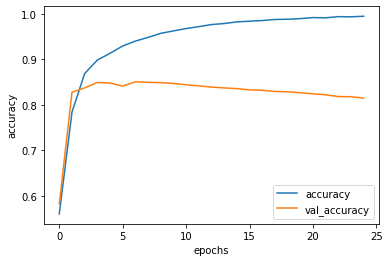

In [25]:
display_plot('accuracy', history)

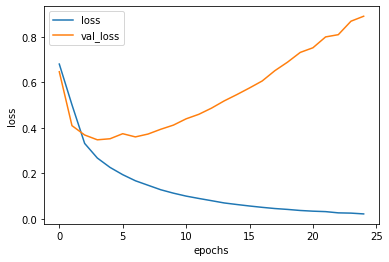

In [26]:
display_plot('loss', history)

In [27]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding, truncating=trunc)
print(model.predict(padded))

[[9.8006755e-01]
 [3.6457067e-08]]
